## Laboratory 11

# Control design of a robot arm process

## 11.1 Computed Torque Control

Computed torque control (in some places called feedback linearization control) is a more sophisticated and modern control strategy that can be used to increase the control performances. The control consists out of an inner feedback loop and an outer feedback loop: fig.11.1. Although it is a nonlinear control approach, because the inner feedback loop achieves dynamic linearization, the outer feedback loop resume to a classical linear control design.  

<br>
<br>

<center>
    <figure class="image">
      <img src="artwork/control/Control_2.png" width=60% />
      <figcaption>Figure 11.1: Computed torque control - feedback linearization - principal control structure </figcaption>
    </figure>
</center>

<br>
<br>

Consider the robot arm process model:

\begin{equation}\label{lastmodel}
D(q)\ddot{q}+C(q,\dot{q})\dot{q}+G(q)=\tau \text{ (1)}
\end{equation}

By the change of notation $V(q,\dot{q})=C(q,\dot{q})\dot{q}+G(q)$ we can rewrite the model more compactly as

\begin{equation}
D(q)\ddot{q}+V(q,\dot{q})=\tau \text{ (2)}
\end{equation}

Consider the following control law for the inner control loop:
\begin{equation}\label{controlaw}
\tau=D(q)(\ddot{q}_r-u)+V(q,\dot{q}) \text{ (3)}
\end{equation}

We define the tracking error as
\begin{equation}\label{error}
e=q_r-q. \text{ (4)}
\end{equation}
Then $\dot{e}=\dot{q}_r-\dot{q} \quad and \quad \ddot{e}=\ddot{q}_r-\ddot{q}$.

By replacing the torque from eq(3) in model eq(2), and using the definition eq(4), we obtain:

\begin{equation}\label{doubleintegrator}
\ddot{e}=u \text{ (5)}
\end{equation}

Thus the inner feedback loop achieves dynamic linearization, in other words the outer loop "sees" a double integrator process.
The double integrator model eq(5) can be written in state space form:

\begin{equation}
\dot{x_e}=Ax_e+Bu \text{ (6)}
\end{equation}

with 

\begin{equation}
x_e=\begin{bmatrix}
e\\
\dot{e}
\end{bmatrix},
A=\begin{bmatrix}
0_n & I_n \\
0_n & 0_n \\
\end{bmatrix},
B=\begin{bmatrix}
0_n \\
I_n
\end{bmatrix} \text{ (7)}
\end{equation}

where $x$ is a $m\times1$ matrix, $n$ being the number of inputs, $m = 2n$ being the number of states .

Now the outer loop can be designed by any classical linear control technique. We will consider here a state feedback control law with integrator component:

\begin{equation}\label{statefeedback}
u=-Kx+K_i\epsilon \text{ (8)}
\end{equation}

where $\epsilon$ is the output of the integrator ($\dot{\epsilon}=e$) with dimension $n\times1$ - see Fig:11.2. The multiplication of the integrator term is done element by element, $K_i$ being a $n\times1$ column vector as well. The multiplication of the state feedback term is a matrix multiplication, with K of dimension $n\times m$.


We will first design the state feedback gain K using Ackerman's formula for a $m^{th}$ order system:

$$K=[\underbrace{0_n \, ... 0_n \,  }_{\substack{\textrm{m-1 times}}}I_n]M^{-1}_c \Delta(A)\text{ (9)}$$

where $\Delta$ is the desired characteristic polynomial of the closed loop system

\begin{equation}
\Delta(s)=s^{m}+a_{m-1}s^{m-1}+...+a_1s^1+a_0,  \text{ (10)}
\end{equation}

and $M_c$ is the controllability matrix of dimension $m\times nm$:

\begin{equation}
M_c=[B|AB|A^2B|... |A^{m-1}B]. \text{ (11)}
\end{equation}

After the state feedback gain K is designed through pole placement, we will consider that the integrator gain can be designed through trial and error in simulations, in order the achieve the best tracking performances possible, while taking into account nonlinear effects like saturation, dead-zones or backlash.

Finally, the detailed control structure is shown in Figure 11.2.

<br>
<center>
    <figure class="image">
      <img src="artwork/control/Control_3.png" width=60% />
      <figcaption>Figure 11.2: Computed torque control - feedback linearization - detailed control structure </figcaption>
    </figure>
</center>

##  11.2 Numerical results

###  Robot arm example

As an example of a 2DOF robot with the structure as in Figure 7.1 (from Dynamic Model laboratory).

The parameters are (either measured or estimated) :$L_1=0.095 \ m$, $L_2=0.1 \ m$, $m_1=0.095 \ kg$, $m_2=0.37\ kg$, $g=9.81 \ m/s^2$, $I_{1x}=2.27 \ 10^{-2} \ kg \ m^2$, $I_{2y}=2.27 \ 10{-2} \ kg \ m^2$, $b_1=0.24$, $b_2=0.16$, $r=1$. The torque control signal is limited to the range $[-1.18,1.18] \, Nm$.

<center>
    <figure class="image">
      <img src="artwork/control/Control_4.png" width=40% />
      <figcaption>Figure 11.3: Real robot arm process  </figcaption>
    </figure>
</center>

###  Control simulation

Consider the inner feedback loop with control law eq(3), and the outer feedback loop with control law eq(8) (Figure 11.1)

We will design the state feedback gain K through pole placement. Consider the following closed loop pole configuration [-4 -4 -9 -9] (desired eigenvalues for $A-BK$). The poles where chosen such that we get an overdamped and fast enough response, while avoiding saturation as much as possible. As the poles are moved farther to the left in the complex plane, the response becomes faster, but the control effort increases. 

\begin{equation}
K=\begin{bmatrix}
36 & 0 & 13 & 0\\
0 & 36 & 0 & 13
\end{bmatrix} \text{ (22)}
\end{equation}


The integrator gain $K_i$ is found through trial and error in simulations:
we increase the gain starting from an initial value of 0.1 - until the maximum steady state error starts to increase. We keep the previous iterated value. Thus, we finally arrive at the value $0.6$ (that is $K_i=[0.6 \quad 0.6]$).   

For a better comparison between the performances of the PD+gravity control approach versus the computed torque control, we reconsider the sinusoidal reference input from the previous section, but now we will look directly at the tracking errors defined as $e_1=q_{r1}-q_1, \, e_2=q_{r2}-q_2$. Figure 11.4 shows the tracking errors for the two joint positions  in the case of PD+gravity control. The maximum error is about 0.05 rad (2.8 deg). For the Computed Torque control the results are shown in Figure 11.15. Notice that the maximum error is now much smaller 0.01 rad (0.5 deg). Of course that the cost is an increase complexity for the controller - the implementation requires a considerable increase in computational power.

<center>
    <figure class="image">
      <img src="artwork/control/Control_9.png" width=70% />
      <figcaption>Figure 11.4:Tracking error for PD$+$grav control  </figcaption>
    </figure>
</center>

<center>
    <figure class="image">
      <img src="artwork/control/Control_10.png" width=70% />
      <figcaption>Figure 11.5: Tracking error for Computer Torque Control </figcaption>
    </figure>
</center>

## 11.3 Proposed problems

  1. Consider the same AL5D_mdw robot. Implement a Computed Torque Control with state feedback controllers and an outer loop integrator.
  2. Make some small changes in the model estimation (so not the real model) to check if the controller is still able to keep good performances. 

For the first exercise, there are some steps to be taken into consideration. 

We first have to eliminate the nonlinear element from the model. In order to do that, we remodel the equation of the torques using the D and V matrices (figure 11.6 and 11.7), which will later linearize the system. For that, we can just define 2 functions that would take the positions and velocities as input and return their respective terms (the following code cell).
    
<br>

<center>
    <figure class="image">
      <img src="artwork/control/Control_3_2.png" width=50% />
      <figcaption>Figure 11.6: D term </figcaption>
    </figure>
</center>

<center>
    <figure class="image">
      <img src="artwork/control/Control_3_1.png" width=50% />
      <figcaption>Figure 11.7: V term </figcaption>
    </figure>
</center>

In [1]:
# model estimation
# run this cell in order to load the functions in the workspace

def Dterm(rob, x, a):
    """ function computing the D term = D*acceleration vector"""
      
    q  = x[:,0]  #first column of x, the states
    dq = x[:,1]  #second column of x, the states derivated

    D = rob.inertia(q)
    
    return D@a

def Vterm(rob, x):
    """ function computing the V term = C*velocity vector + G"""

    q  = x[:,0]  #first column of x, the states
    dq = x[:,1]  #second column of x, the states derivated

    C = rob.coriolis(q, dq)
    G = rob.gravload(q).reshape(5,1)
    
    return (C@dq).reshape(5,1) + G

After that, since we have a linearised system, we can try to just use a state feedback controller (with the error and error derivatives as states) for the inner control loop (fig. 11.8) and an integrator term for the outer control loop(fig. 11.9).


<center>
    <figure class="image">
      <img src="artwork/control/Control_3_3.png" width=50% />
      <figcaption>Figure 11.8: Inner loop controller </figcaption>
    </figure>
</center>

<center>
    <figure class="image">
      <img src="artwork/control/Control_3_4.png" width=50% />
      <figcaption>Figure 11.9: Outer loop controller </figcaption>
    </figure>
</center>

In [2]:
import roboticstoolbox as rtb
from roboticstoolbox import *
import numpy as np
import matplotlib.pyplot as plt
from math import pi 
from scipy.integrate import odeint
import math as m
from odeintw import *
from spatialmath import *
from spatialmath.base import *
from scipy.signal import place_poles 
from lab_functions import *
plt.style.use('rcs.mplstyle')

# load the robot in workspace
rob = rtb.models.DH.AL5D_mdw()

# real model
def model(x,t,tau):
    g  = 9.8
  
    tau = tau.reshape(5,1) # reshaping for mathematical operations

    q  = x[:,0]  #first column of x, the states
    dq = x[:,1]  #second column of x, the states derivated

    G = rob.gravload(q).reshape(5,1)
    D = rob.inertia(q)
    C = rob.coriolis(q, dq)

    xdot1 = dq.reshape(5,1)
    xdot2 = np.matmul(np.linalg.inv(D), (tau - C.dot(dq).reshape(5,1) - G))
    
    xdot = np.concatenate((xdot1, xdot2), axis=1)

    return xdot

# time interval/sampling time
dt = 0.01

# final time
tf = 10

# nr of samples
n = int(np.round(tf/dt))

# Desired time samples for the solution.
t = np.arange(0, tf, dt)

# trajectory planning
sp_q   = 0.5*np.sin(t)
dsp_q  = 0.5*np.cos(t)
ddsp_q = -sp_q

# x0 is the initial condition of the states
x0 = np.zeros((5,2))

# initialisations
q   = np.zeros((n,5))
dq  = np.zeros((n,5))
ddq = np.zeros((n,5))
tau = np.zeros((n,5))
u   = np.zeros((n,5))

# pole placement for inner loop state feedback
# syntax for place_poles from scipy: place_poles(A,B,p)
# where A and B are 2 dimensional arrays taken from the state space representation, p is an array of desired poles
A = np.zeros((10,10))
A[0,5] = 1; A[1,6] = 1; A[2,7] = 1; A[3,8] = 1; A[4,9] = 1;
print(A)
B = np.zeros((10,5))
B[5,0] = 1; B[6,1] = 1; B[7,2] = 1; B[8,3] = 1; B[9,4] = 1;
print(B)
p = np.array([-7, -8, -9, -10, -11, -12, -13, -14, -15, -16]) # from system theory I, II
K = place_poles(A,B,p).gain_matrix

# Define and tune by hand integrator gain
Ki = 0.6

terror = np.zeros(5)
# solve ODE for each step
for i in range(1,n):
    printProgressBar((i+1)/n, prefix="Progress:", suffix="complete", length=60)

    # span for next time step
    tspan = [t[i-1],t[i]]
    
    # calculate total error (integral) for each joint
    terror = terror + sp_q[i] - q[i-1,:]
    
    # calculate integrator term as in equation 8
    integrator_term = Ki*terror*dt
    
    # calculate state feedback from error and derivative of error as in equation 8
    aux = np.concatenate((sp_q[i] - q[i-1,:],dsp_q[i]-dq[i-1,:]))
    state_feedback = -K@(aux.reshape((10,1)))

    # calculate state feedback with integration as in equation 8
    u[i,:] = state_feedback.reshape((1,5)) + integrator_term

    # linearising inner controller as in equation 3
    tau[i,:] =  Dterm(rob,x0,ddsp_q[i]-u[i,:]) + Vterm(rob,x0).reshape(1,5)
    
    # solve for next step
    x = odeintw(model,x0,tspan,args=(tau[i,:],))

    # store solution for plotting
    q[i,:]  = x[1][:,0]
    dq[i,:] = x[1][:,1]
    
    # next initial condition 
    x0 = x[1]

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


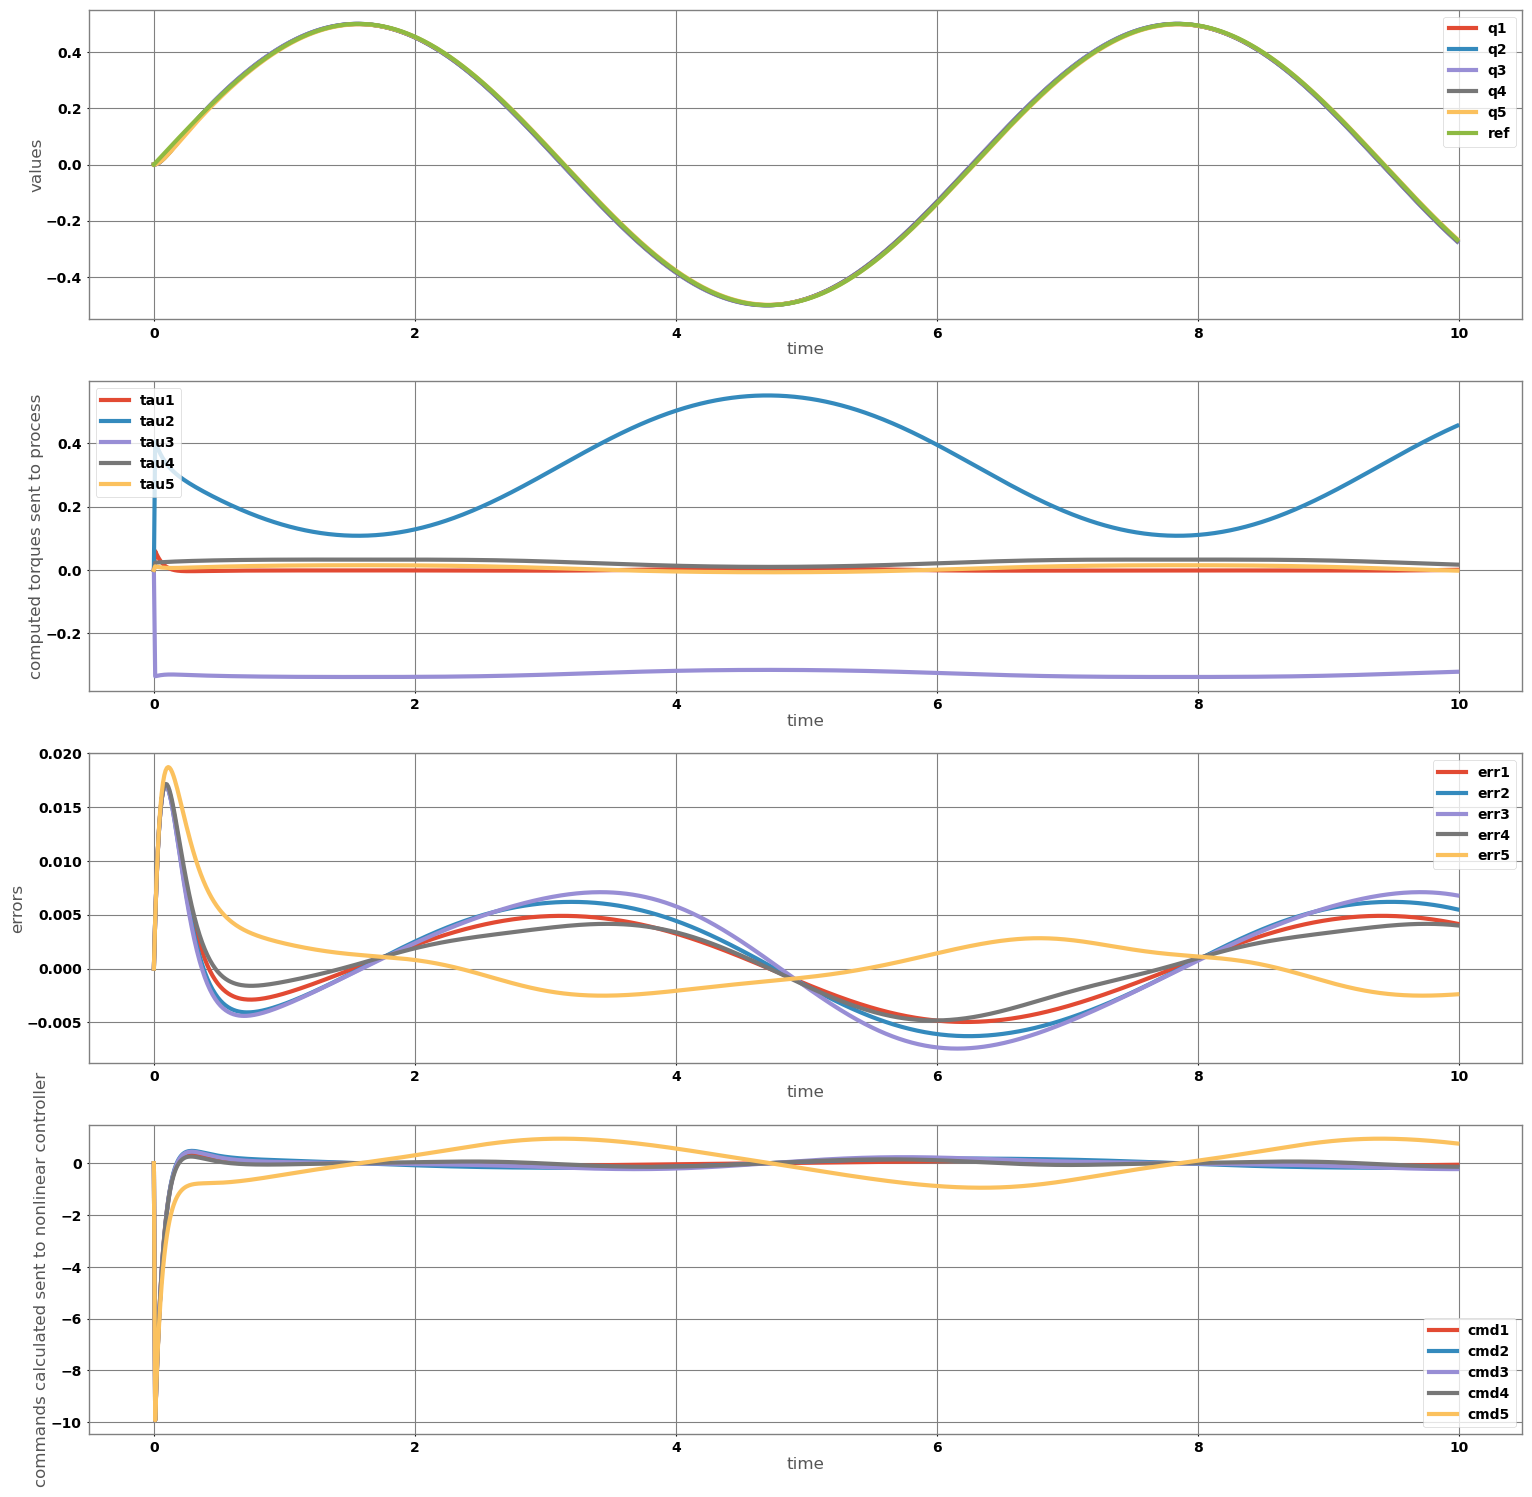

In [3]:
plt.style.use('rcs.mplstyle')
fig = plt.figure()
fig.set_size_inches(18.5, 18.5)

plt.subplot(4, 1, 1)
plt.plot(t, q[:,0], label='q1')
plt.plot(t, q[:,1], label='q2')
plt.plot(t, q[:,2], label='q3')
plt.plot(t, q[:,3], label='q4')
plt.plot(t, q[:,4], label='q5')
plt.plot(t, sp_q, label='ref')
plt.legend(loc='best')
plt.ylabel('values')
plt.xlabel('time')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, tau[:,0], label='tau1')
plt.plot(t, tau[:,1], label='tau2')
plt.plot(t, tau[:,2], label='tau3')
plt.plot(t, tau[:,3], label='tau4')
plt.plot(t, tau[:,4], label='tau5')
plt.legend(loc='best')
plt.ylabel('computed torques sent to process')
plt.xlabel('time')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, sp_q-q[:,0], label='err1')
plt.plot(t, sp_q-q[:,1], label='err2')
plt.plot(t, sp_q-q[:,2], label='err3')
plt.plot(t, sp_q-q[:,3], label='err4')
plt.plot(t, sp_q-q[:,4], label='err5')
plt.legend(loc='best')
plt.ylabel('errors')
plt.xlabel('time')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, u[:,0], label='cmd1')
plt.plot(t, u[:,1], label='cmd2')
plt.plot(t, u[:,2], label='cmd3')
plt.plot(t, u[:,3], label='cmd4')
plt.plot(t, u[:,4], label='cmd5')
plt.legend(loc='best')
plt.ylabel('commands calculated sent to nonlinear controller')
plt.xlabel('time')
plt.grid(True)
plt.show()

In [ ]:
# animation

rob = rtb.models.URDF.AL5D_mdw()
rob.plot(q, backend="swift")